## Step 1: Reading the data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
%matplotlib inline

In [2]:
file_path = './data/train.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Cleaning the data

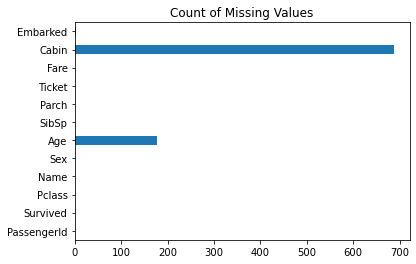

In [5]:
df.isnull().sum().plot(kind='barh')
plt.title('Count of Missing Values');

In [6]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [83]:
df.shape

(891, 12)

In [84]:
df.dropna(subset=['Embarked'], inplace = True)

In [85]:
df.shape

(889, 12)

Filling all empty cabins with **¯\\_(ツ)_/¯** just for fun.

In [86]:
df['Cabin'].fillna('¯\(ツ)/¯', inplace = True)

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

Adding a `FamilyCount` column:

In [88]:
df['FamilyCount'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


Creating a column called `IsReverend`. The value will1 if they're a preacher, 0 if they're not:

In [89]:
df[df['Name'].str.contains("Harper")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C,1
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,¯\(ツ)/¯,S,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,¯\(ツ)/¯,S,1


In [90]:
df['IsReverend'] = (df['Name'].str.contains("Rev.") == True).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [91]:
df[df['Name'].str.contains("Harper")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1,0
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C,1,0
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,¯\(ツ)/¯,S,1,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,¯\(ツ)/¯,S,1,1


Dummifying categorical data:

In [92]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


In [93]:
df['Sex'] = pd.get_dummies(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


Extracting the titles from everyone's name and creating dummy columns:

In [95]:
df['Titles'] = df['Name'].str.extract(' ([A-Za-z]+\.)', expand = False)

In [96]:
titles_dummies = pd.get_dummies(df['Titles'], prefix='Title')
df = pd.concat([df, titles_dummies], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major.,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Exploratory analysis 

Overall survival rate:

In [98]:
df['Survived'].mean()

0.38245219347581555

38.25%

Men fared the worse:

In [100]:
(df[df['Sex'] == 0][['Survived']].mean())

Survived    0.188908
dtype: float64

Men fared the worst. Their survival rate was 18.89%

Pclass survival rate:

In [114]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

6 reverends survived:

In [102]:
(df[df['Title_Rev.'] == 1][['Survived']].count())

Survived    6
dtype: int64

The survival rate for cabins marked **¯\\_(ツ)_/¯**:

In [132]:
(df[df['Cabin'] == '¯\(ツ)/¯'][['Survived']].mean())

Survived    0.299854
dtype: float64

The survival rate for people whose `Age` is empty:

In [103]:
df[df['Age'].isnull()]['Survived'].mean()

0.2937853107344633

Survival rate for each port of embarkation:

In [105]:
(df[df['Embarked_C'] == 1][['Survived']].mean())

Survived    0.553571
dtype: float64

In [106]:
(df[df['Embarked_Q'] == 1][['Survived']].mean())

Survived    0.38961
dtype: float64

In [111]:
(df[df['Embarked_S'] == 1][['Survived']].mean())

Survived    0.336957
dtype: float64

Survival rate for children (under 12) in each `Pclass`?

In [118]:
df[df['Age'] < 12].groupby('Pclass').mean()['Survived']

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

The captain didn't survive:

In [122]:
df[df['Title_Capt.'] == True][['Survived']].mean()

Survived    0.0
dtype: float64

The most expensive ticket for a person who died was:

In [124]:
df[df['Survived'] == False][['Fare']].max()

Fare    263.0
dtype: float64

Having family onboard appears to have help increased the likelihood of survival:

In [127]:
df[df['FamilyCount'] > 0][['Survived']].mean()

Survived    0.50565
dtype: float64

In [129]:
df[df['FamilyCount'] == 0][['Survived']].mean()

Survived    0.300935
dtype: float64

# Step 5: Plotting

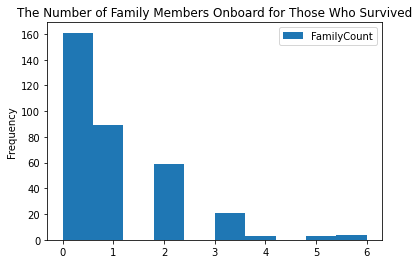

In [148]:
df[df['Survived'] == 1][['FamilyCount']].plot(kind='hist')
plt.title("The Number of Family Members Onboard for Those Who Survived");

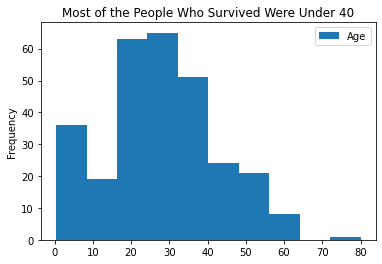

In [212]:
df[df['Survived'] == 1][['Age']].plot(kind='hist')
plt.title("Most of the People Who Survived Were Under 40");

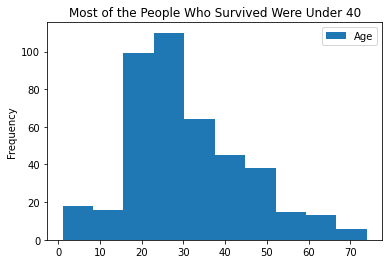

In [213]:
df[df['Survived'] == 0][['Age']].plot(kind='hist')
plt.title("Most of the Dead Were Between 18 and 35");

Text(0.5, 1.0, 'The Number of Family Members Onboard for Those Who Died')

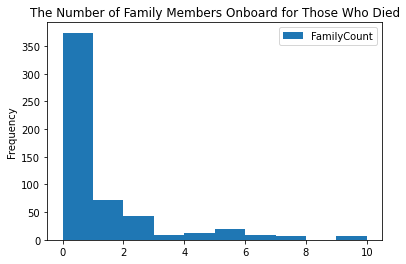

In [149]:
df[df['Survived'] == 0][['FamilyCount']].plot(kind='hist')
plt.title("The Number of Family Members Onboard for Those Who Died")

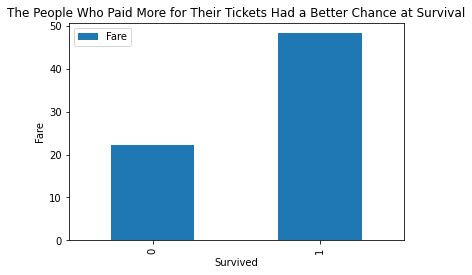

In [208]:
df.groupby('Survived').mean()[['Fare']].plot(kind='bar')
plt.ylabel("Fare")
plt.title("The People Who Paid More for Their Tickets Had a Better Chance at Survival");

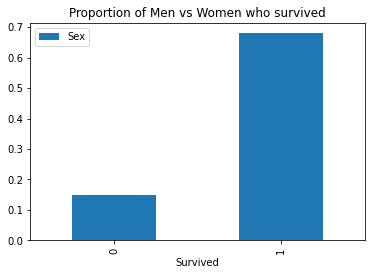

In [207]:
df.groupby('Survived').mean()[['Sex']].plot(kind='bar')
plt.title('More Women Than Men Survived');

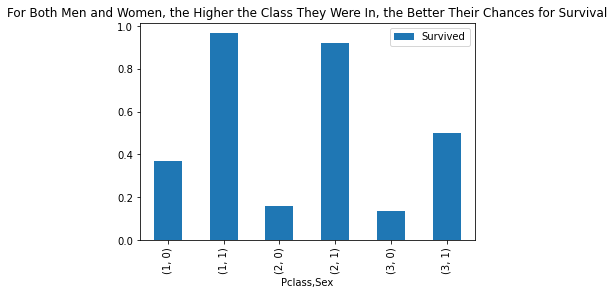

In [210]:
df.groupby(['Pclass', 'Sex']).mean()[['Survived']].plot(kind='bar')
plt.title("For Both Men and Women, the Higher the Class They Were In, the Better Their Chances for Survival");

In [160]:
everything_but_titles_survived = df.loc[df['Survived'] == True, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'FamilyCount', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

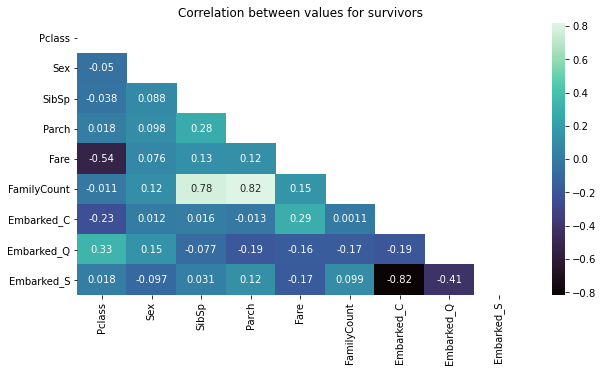

In [162]:
plt.figure(figsize=(10 , 5))
correlation = everything_but_titles_survived.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, annot=True, mask=mask, cmap="mako")
plt.title("Correlation between values for survivors");